# CREATING THE FINAL DATASET

IMPORTING THE RAW DATASET

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('upi_fraud_dataset.csv')

In [4]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


ANALYSING THE DATASET

In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
fraud = dataset[dataset['isFraud'] == 1]
valid = dataset[dataset['isFraud'] == 0]

In [8]:
print("Number of fraud data :", len(fraud))
print("Number of valid data :", len(valid))

Number of fraud data : 8213
Number of valid data : 6354407


In [9]:
import seaborn as sns

<Axes: xlabel='isFraud', ylabel='count'>

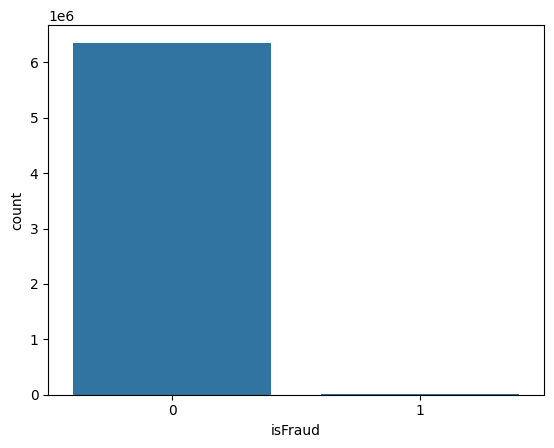

In [10]:
sns.countplot(x = 'isFraud', data = dataset)

BALANCING THE DATASET USING "UNDER-SAMPLING"

In [11]:
valid = valid.sample(len(fraud))

In [12]:
dataset = pd.concat([valid, fraud], axis = 0)

In [13]:
dataset = dataset.sort_index()

In [13]:
dataset.reset_index(drop = True, inplace = True)

In [14]:
import numpy as np

DELETING THE REDUNDANT FEATURES

In [15]:
del dataset['nameOrig']
del dataset['nameDest']
del dataset['isFlaggedFraud']
del dataset['step']


In [16]:
dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.0,1
251,TRANSFER,2806.00,2806.0,0.0,0.0,0.0,1
252,CASH_OUT,2806.00,2806.0,0.0,26202.0,0.0,1
320,PAYMENT,14420.66,0.0,0.0,0.0,0.0,0


In [17]:
# Check for missing values
print(dataset.isnull().sum())
print("\nMissing percentage:")
print((dataset.isnull().sum() / len(dataset)) * 100)

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Missing percentage:
type              0.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
dtype: float64


In [18]:
dataset.describe()
dataset.select_dtypes(include='object').describe()

,type
count,16426
unique,5
top,CASH_OUT
freq,7045


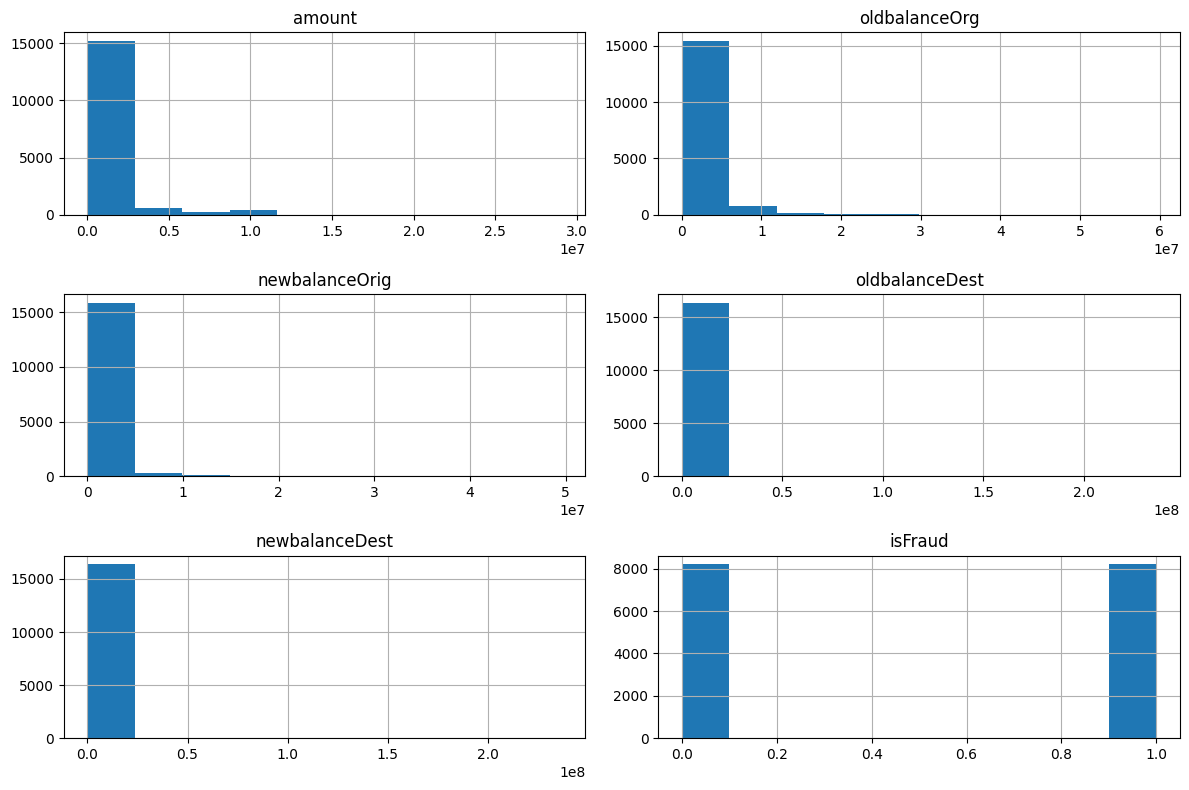

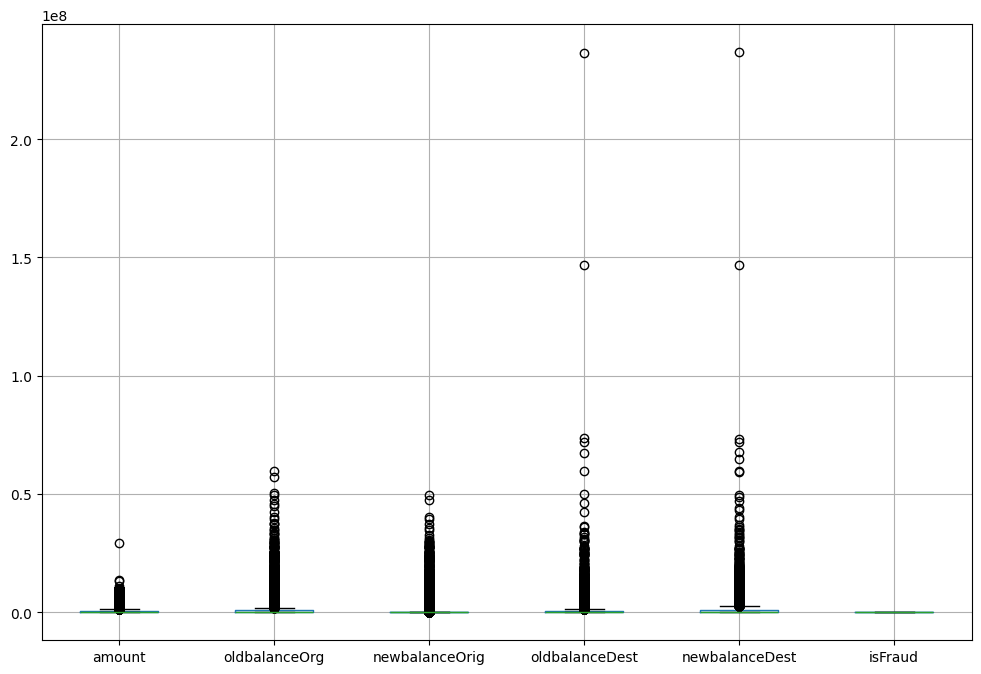

In [19]:
import matplotlib.pyplot as plt

# Histograms for numerical features
dataset.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots to detect outliers
dataset.boxplot(figsize=(12, 8))
plt.show()

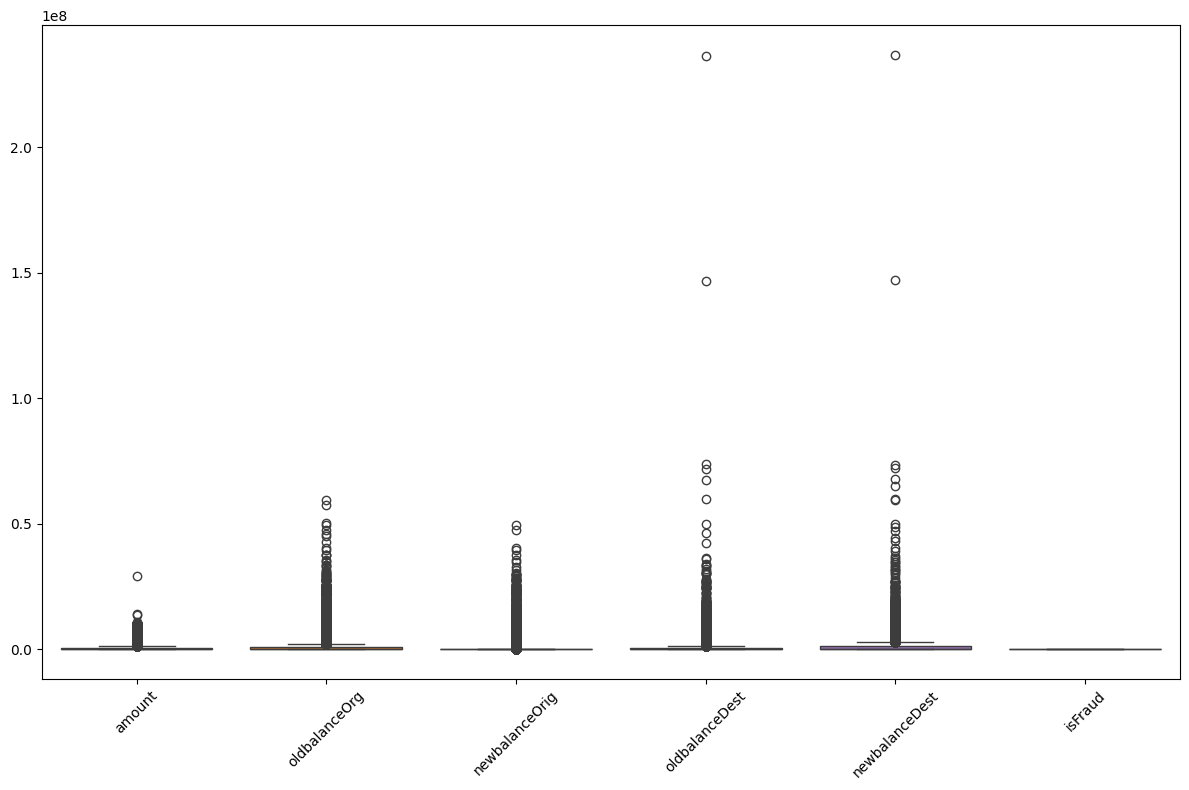

In [20]:
numeric_data = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

USING LABELENCODER

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [22]:
dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.0,1
251,TRANSFER,2806.00,2806.0,0.0,0.0,0.0,1
252,CASH_OUT,2806.00,2806.0,0.0,26202.0,0.0,1
320,PAYMENT,14420.66,0.0,0.0,0.0,0.0,0


SAVING THE FINAL DATASET

In [23]:
import os.path

In [27]:
if os.path.isfile('../dataset/train_dataset.csv') is False:
    dataset.to_csv('../dataset/train_dataset.csv')

ANALYSING THE UPDATED DATASET

In [28]:
dataset.shape

(16426, 7)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  object 
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.0+ MB


In [30]:
fraud = dataset[dataset['isFraud'] == 1]
valid = dataset[dataset['isFraud'] == 0]

In [31]:
print("Number of fraud data :", len(fraud))
print("Number of valid data :", len(valid))

Number of fraud data : 8213
Number of valid data : 8213


<Axes: xlabel='isFraud', ylabel='count'>

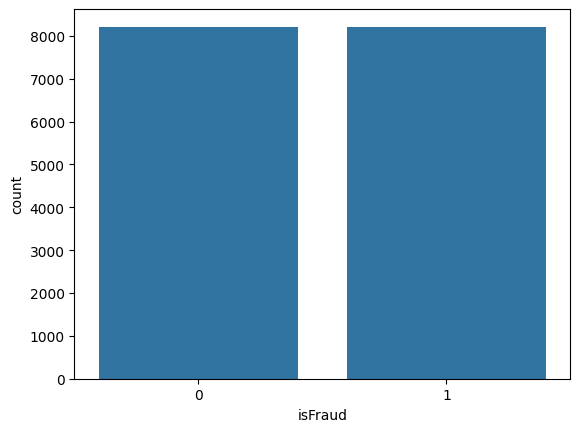

In [32]:
sns.countplot(x = 'isFraud', data = dataset)

In [33]:
dataset.nunique()

type                  5
amount            12183
oldbalanceOrg      9336
newbalanceOrig     3682
oldbalanceDest     7633
newbalanceDest     9155
isFraud               2
dtype: int64